In [1]:
import pandas as pd
import numpy as np

SciANN_df = pd.read_csv('SciANN_collected_info_varying_HL.csv')
SciANN_df['Tag'] = 'SciANN'

FBPINN_df = pd.read_csv('FBPINN_collected_info_varying_HL.csv')
FBPINN_df['Tag'] = 'FBPINN'

In [2]:
# merge these two dataframes
merged_df = pd.concat([SciANN_df, FBPINN_df])
# sort by Hidden Layers
merged_df['Hidden Layers'] = pd.Categorical(merged_df['Hidden Layers'], categories=['3x5', '5x5', '3x10', '5x10', '3x20', '5x20'], ordered=True)
merged_df.tail()

,Time Limit,Hidden Layers,MSE Learned,MSE Test,Model Type,Learned Parameters,Tag
49,0-24,5x5,0.000083,0.000134,survival,[0.0637 0.3003 0.6044 2.8213 0.0333],FBPINN
50,0-24,3x10,0.000087,0.000136,survival,[0.0553 0.3003 0.6095 3.173 0.2184],FBPINN
51,0-24,5x10,0.000092,0.000130,survival,[0.0726 0.3003 0.6041 2.5295 0.0317],FBPINN
52,0-24,3x20,0.000112,0.000117,survival,[0.0883 0.3004 0.6016 2.1492 0.0317],FBPINN
53,0-24,5x20,0.000083,0.000149,survival,[0.0858 0.3003 0.6084 2.1734 0.26 ],FBPINN


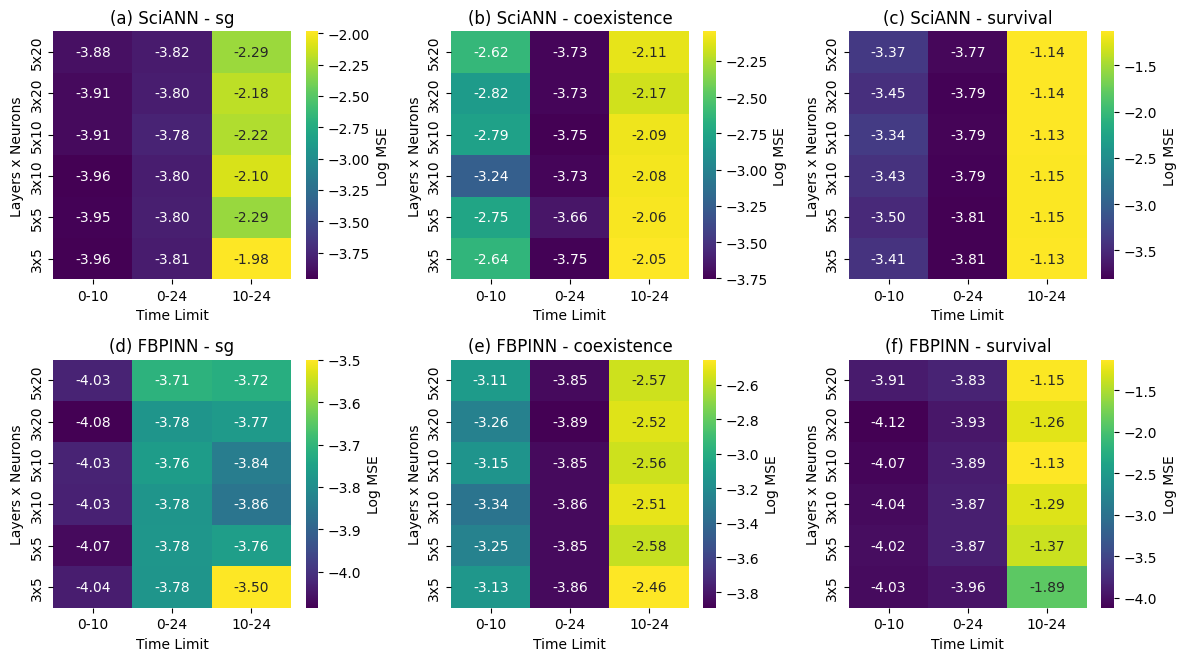

In [3]:
# make a 3x2 grid of subplots
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
merged_df['MSE Learned'] = pd.to_numeric(merged_df['MSE Learned'], errors='coerce')
merged_df['MSE Test'] = pd.to_numeric(merged_df['MSE Test'], errors='coerce')

# Define the tags and model types
tags = ['SciANN', 'FBPINN']
model_types = ['sg', 'coexistence', 'survival']
time_limits = ['0-10', '10-24', '0-24']
fig_tag = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Loop through each tag and model type to create the pivot plot
for i, tag in enumerate(tags):
    for j, model_type in enumerate(model_types):
        # Filter the dataframe
        df_filtered = merged_df[(merged_df['Tag'] == tag) & (merged_df['Model Type'] == model_type)]
        
        # # Create a pivot table
        pivot_test = df_filtered.pivot(index="Hidden Layers", columns="Time Limit", values="MSE Test")
        pivot_test_log = pivot_test.map(lambda x: np.log10(x + 1e-10))
        
        # Plot the heatmap
        sns.heatmap(pivot_test_log, annot=True, fmt=".2f", cmap='viridis',  cbar_kws={'label': 'Log MSE'}, ax=axes[i, j])
        
        # Set titles and labels
        axes[i, j].set_title(f'{fig_tag[i*3+j]} {tag} - {model_type}')
        axes[i, j].set_xlabel('Time Limit')
        axes[i, j].set_ylabel('Layers x Neurons')
        axes[i, j].invert_yaxis()
        axes[i, j].tick_params(axis='y', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# save the plot
plt.savefig('MSE_heatmap_SciANN_Vs_FBPINN_by_HL.png')
